# Data

The data we will be an analyzing today contains the aggregate individual stats of individual NBA players from 1950 - 2017. The date was scrapped from basketball reference and contains players counting statistics ( such as points, steals, block etc. ) as well as advanced statistics such as win share and value over replacement.
This data will be used to help identify what should be considered an average NBA players, and who a NBA general managers be targeting in free agency to help improve his team. This will be accomplished by answering the following three questions :
>1.	What defines an league average NBA player.
>2.	At what age does an NBA player hit his statistical peak?
>3.	Which position holds the most value to an NBA team.


## center questions - remove the line


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
%matplotlib inline
nba_players= pd.read_csv('Seasons_Stats.csv')

# 1) Defining a League Average Player

In order to compare players, we will be looking at the five statistics:  
- Points
- Rebounds
- Assist
- Steals
- Blocks 

Rather than looking at the accumulative totals per season we will be looking at the per game averages. Looking at per game stats is beneficial because it takes into account that the number of games per season has changed over NBA history, players not playing a full season due to injury, or a player sitting on the bench for the majority of the year.

In [110]:
nba_players['Points Per Game'] = nba_players['PTS']/nba_players['G']
nba_players['Rebounds Per Game'] = nba_players['TRB']/nba_players['G']
nba_players['Assist Per Game'] = nba_players['AST']/nba_players['G']
nba_players['Steals Per Game'] = nba_players['STL']/nba_players['G']
nba_players['Blocks Per Game'] = nba_players['BLK']/nba_players['G']

print('The average NBA player averages ' + str(round(np.mean(nba_players['Points Per Game']),2)) + ' points per game, '
       + str(round(np.mean(nba_players['Rebounds Per Game']),2)) + ' rebounds per game, '
       + str(round(np.mean(nba_players['Assist Per Game']),2)) + ' assists per game, ' 
       + str(round(np.mean(nba_players['Steals Per Game']),2)) + ' steals per game, and ' 
       + str(round(np.mean(nba_players['Blocks Per Game']),2)) + ' blocks per game.' )

The average NBA player averages 8.31 points per game, 3.73 rebounds per game, 1.89 assists per game, 0.67 steals per game, and 0.41 blocks per game.


Further investigation of the raw data shows that steals and blocks were not being tracked until the 1978 season. In addition during the 1979 season the NBA introduced a major rule change - implementing the three pointer. Because steals and blocks were not being accounted for in the early data and the three point line introduced a "new era of basketball"- I decide it would be beneficial to only look at data from the 1979 season onwards.

In [111]:
nba_players_modern_era = nba_players.loc[lambda df: nba_players['Year'] >= 1979,:]
print('The average NBA player averages ' + str(round(np.mean(nba_players_modern_era['Points Per Game']),2)) + ' points per game, ' 
    + str(round(np.mean(nba_players_modern_era['Rebounds Per Game']),2)) + ' rebounds per game, ' 
    + str(round(np.mean(nba_players_modern_era['Assist Per Game']),2)) + ' assists per game, ' 
    + str(round(np.mean(nba_players_modern_era['Steals Per Game']),2)) + ' steals per game, and ' 
    + str(round(np.mean(nba_players_modern_era['Blocks Per Game']),2)) + ' blocks per game. ') 

The average NBA player averages 8.07 points per game, 3.48 rebounds per game, 1.85 assists per game, 0.66 steals per game, and 0.41 blocks per game. 


It is interesting to note that despite the introduction of a shot that is worth 1.5 x more points, the scoring average of NBA players saw a decrease when comparing the data from 1979 - 2017 and 1950 - 2017.

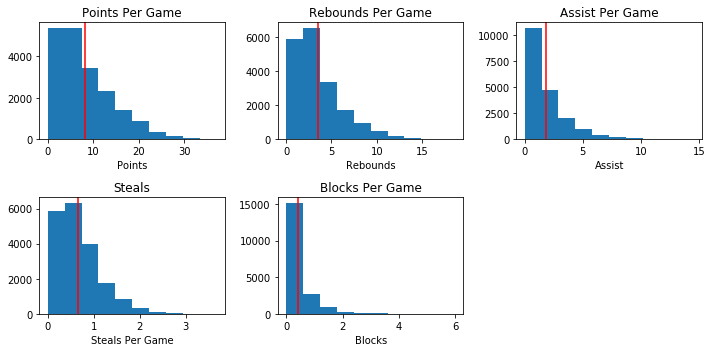

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.hist(nba_players_modern_era['Points Per Game'])
plt.xlabel('Points')
plt.axvline(np.mean(nba_players_modern_era['Points Per Game']),color='r')
plt.title('Points Per Game')
plt.subplot(2, 3, 2)
plt.hist(nba_players_modern_era['Rebounds Per Game'])
plt.xlabel('Rebounds')
plt.axvline(np.mean(nba_players_modern_era['Rebounds Per Game']),color='r')
plt.title('Rebounds Per Game')
plt.subplot(2, 3, 3)
plt.hist(nba_players_modern_era['Assist Per Game'])
plt.xlabel('Assist')
plt.axvline(np.mean(nba_players_modern_era['Assist Per Game']),color='r')
plt.title('Assist Per Game')
plt.subplot(2, 3, 4)
plt.hist(nba_players_modern_era['Steals Per Game'])
plt.xlabel('Steals Per Game')
plt.axvline(np.mean(nba_players_modern_era['Steals Per Game']),color='r')
plt.title('Steals')
plt.subplot(2, 3, 5)
plt.hist(nba_players_modern_era['Blocks Per Game'])
plt.xlabel('Blocks')
plt.axvline(np.mean(nba_players_modern_era['Blocks Per Game']),color='r')
plt.title('Blocks Per Game')
plt.tight_layout()
plt.show()

Once the averages were established,  I plotted out histograms of per game averages. Each Histogram of the counting statistics show that none of the variables have a normal distribution. Is fact, most players fall slightly under the average. These histograms suggest that many players excel at one or more of the statistics we are looking at, but  few excel at all. In order to get a better understanding of a league average players contributions to a team, a system is needed to look at the accumulative statistics a player compiles per game.

To try and simplify the data and look at a players total contributions, I adapted a the following scoring system where each counting statistic was given a weighted value. Rather than try and create a weighting system on my own, I have adapted the following system from the daily fantasy website Draft Kings. Draft Kings assigns Fantasy Points to each counting statistic as follows :  

-  Point: 1 FTP 
-  Rebound: 1.25 FTP
-  Assist: 1.5 FTP
-  Steal: 2 FTP
-  Block: 2 FTP
## come back and center


The average NBA player contributes 17.29 Fantasy Points per game


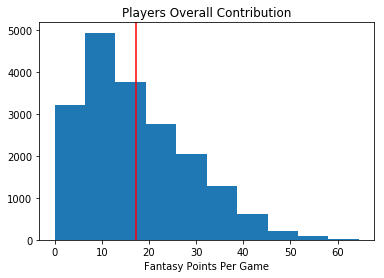

In [11]:
nba_players['overall_contribution'] = (
    (nba_players['PTS']/nba_players['G']*1)+
    (nba_players['TRB']/nba_players['G']*1.25)+
    (nba_players['AST']/nba_players['G']*1.5)+
    (nba_players['STL']/nba_players['G']*2)+
    (nba_players['BLK']/nba_players['G']*2))
nba_players_modern_era = nba_players.loc[lambda df: nba_players['Year'] > 1979,:]
print('The average NBA player contributes ' + str(round(np.mean(nba_players_modern_era['overall_contribution']),2)) + ' Fantasy Points per game' )
plt.hist(nba_players_modern_era['overall_contribution'])
plt.axvline(np.mean(nba_players_modern_era['overall_contribution']),color='r')
plt.title('Players Overall Contribution')
plt.xlabel('Fantasy Points Per Game')
plt.show()

By grouping a players value in terms of fantasy stats - we can get an much better idea of what an average players impact 
on a game should be. We can conclued that an average NBA player should contribute 17.29 Fantasy Points per game. 

# 2)  What age does an NBA player hit his statistical peak?

In addition to understanding what an average players contribution to a game is, it would be ideal for teams to understand at what age is a players value at its highest and when they should expect to see a significant decline in a players production. 

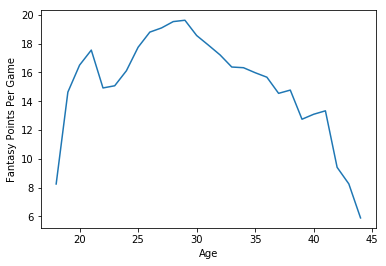

In [112]:
nba_age=nba_players_modern_era.groupby('Age')['overall_contribution'].mean()
y=max(nba_age)
plt.plot(nba_age)
plt.ylabel('Fantasy Points Per Game')
plt.xlabel('Age')
plt.show()
## how do i add in the mean line. have struggled to add it in 

The graph shows us that players peak years are from 25-31. After 31 they see a steady drop off year over year until age 41 where they see an major drop off. This data suggest that a team should target players at age 24/25 on five year contracts as they will likely see the players peak performance during these years. 

# Most Valuable Position in NBA ?

In order to determine value by position - I will take a look at win shares. Basketball Reference describes Win Shares as follows:

>Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. Full details are available below, but the important things to note are that it is calculated using player, team and league-wide statistics and the sum of player win shares on a given team will be roughly equal to that team’s win total for the season.Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. Full details are available below, but the important things to note are that it is calculated using player, team and league-wide statistics and the sum of player win shares on a given team will be roughly equal to that team’s win total for the season.


###do I need a foot note###

I have chosen to look at win shares by the standard three positions Guard, Forward and Center. If a player is listed as multiple positioned I will include them in both categories as it is impossible to determine how much playing time each player was receiving at each position without further analysis. In addition - the move to "position less" basketball, has made it so that determining what exact position the player is occupying on the court at a given time is not always clear.

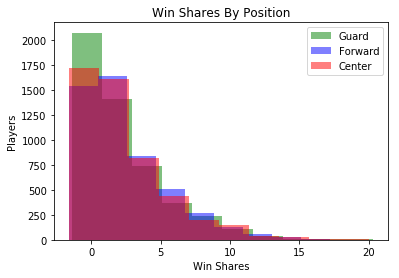

The average WS for a guard is 2.3
The average WS for a foward is 2.5
The average WS for a center is 2.41


F_onewayResult(statistic=4.1824245326510585, pvalue=0.01527926567108536)

In [109]:
nba_players_wp =nba_players.loc[lambda df: nba_players['Year']>= 1979,:]
guard=nba_players_wp.fillna('-')
guard.loc[guard['Pos'].str.contains('G',case=False),'Pos'] = 'Guard'
guard=guard.loc[lambda df:guard['Pos']== 'Guard',:]
guard_ws = np.random.choice(guard['WS'], 5000, replace=True)

forward=nba_players_wp.fillna('-')
forward.loc[forward['Pos'].str.contains('F',case=False),'Pos'] = 'Forward'
forward=forward.loc[lambda df:forward['Pos']== 'Forward',:]
forward_ws = np.random.choice(forward['WS'], 5000, replace=True)

center=nba_players_wp.fillna('-')
center.loc[center['Pos'].str.contains('C',case=False),'Pos'] = 'Center'
center=center.loc[lambda df:center['Pos']== 'Center',:]
center_ws = np.random.choice(center['WS'], 5000, replace=True)


plt.hist(guard_ws,alpha=0.5,color = 'g', label='Guard')
plt.hist(forward_ws, alpha=0.5, color = 'b', label = 'Forward')
plt.hist(center_ws,alpha=0.5, color ='r', label = 'Center')
plt.xlabel('Win Shares')
plt.title('Win Shares By Position')
plt.ylabel('Players')
plt.legend(loc='upper right') 
plt.show()
### what is the best way to put in comments ###
##suggestions on color scheme?
print('The average WS for a guard is '+ str(round(np.mean(guard['WS']),2)))
print('The average WS for a foward is '+ str(round(np.mean(forward['WS']),2)))
print('The average WS for a center is '+ str(round(np.mean(center['WS']),2)))

stats.f_oneway(guard_ws, forward_ws, center_ws)

By conducting a T test and examining the histogram both show that the win shares by position are not signifigantly diffrent from each other. 

# Conclusion

After examining the data we can conclude that : 
- The average NBA player contributes 17.29 fantasy points per game.
- An NBA player will likely hit his peak at age 30, and have a steady decline from age thirty onward.
- The most valuable position in the NBA is the forward, followed by the center and then finally  the guard.


While people constructing basketball teams are obviously going to be aiming for elite talent rather than just finding a player who is league average, having a way to evaluate how much a player is going to contribute to your teams success and at what age that players contributions to will begin to fall off is key to building a successful team. Especially with the salary cap rules in place, if a team is able to find above league average players who are entering the prime years of their career to supplement super star elite players, they are much more likely to find success. A general manager should also focus more of his attention on the forward position, as that position has the highest value to his team. 

# Additional Research

The Data shows that through NBA history that Guards have been the least valuable position on a team in terms of win share. Further analysis should be conducted to take win share statistics of championship teams to compare to those of non-championship teams to see if this holds true. Do teams who win the championship have a shared make up that is different from the league average? 

Research should also be conducted to see if this this win share value is projected to change? The NBA seems to have an increasing amount of guard talent and less and less centers. How has the value of guards changed over time and is it possible to project if a guards value will surpass that of centers or forwards in the near future. If the league is changing, key decision makers need to project these changes and try and get ahead of the curve rather than continue to do what worked 10 years ago. 
